In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = "retina"

import sys
sys.path.append("../files")
import utils

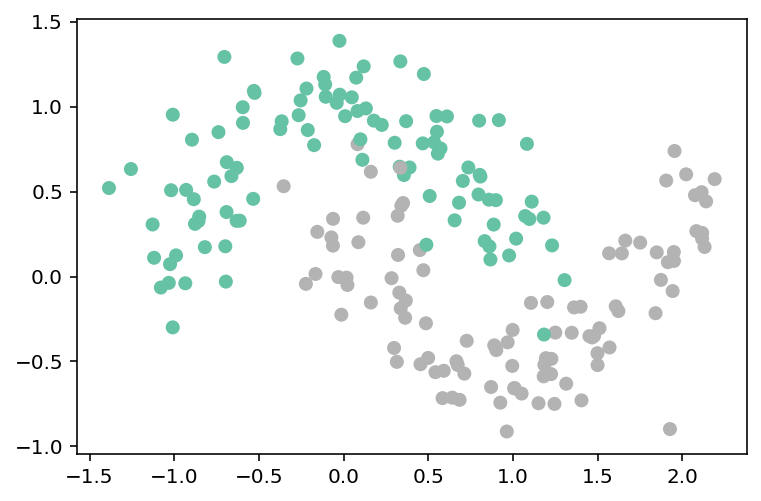

In [2]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

1. Crea un pipeline llamado model que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (LogisticRegression(penalty="none"))

In [3]:
model = Pipeline((
 ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
 ("log_reg", LogisticRegression(penalty="none")),
 ))


2. Realiza un Bagging Classifer de model llamado bagging_logreg con n_estimators=100 y random_state=314

In [4]:
bag_clf = BaggingClassifier(
 model, n_estimators=100, random_state=314,
 max_samples=100, bootstrap=True, n_jobs=-1
 )

3. Entrena model y bagging_logreg considerando X y y definido arriba

In [5]:
bag_clf.fit(X, y)
y_pred = bag_clf.predict(X_test)

4. Grafica la función de decisión dada por model y por bagging_logreg ¿Qué observas?

In [6]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_classf_model(X, y, model, ax, title=None, step=0.01, epsilon=0.1, contour=False):
    """
    Contourplot a two-class underlying model, and test datapoints.
    
    Paramters
    ---------
    X: Matrix(mxn, R)
        Matrix of feature vectors with examples
    y: n-dimensional vector 
        Actual classes for each of the 'm' provided examples.
    """
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    points_cmap = ListedColormap(["Yellow", "Blue"])
    x0, x1 = X[:,0].min() - epsilon, X[:,0].max() + epsilon
    y0, y1 = X[:,1].min() - epsilon, X[:,1].max() + epsilon
    
    xx, yy = np.mgrid[x0:x1:step, y0:y1:step]
    
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    
    if contour:
        ax.contour(xx, yy, preds)
    ax.pcolormesh(xx, yy, preds, cmap=custom_cmap)
    ax.scatter(*X.T, c=y, s=50, edgecolor="k", cmap=points_cmap)
    if title is not None:
        ax.set_title(title)

C:\Users\migro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


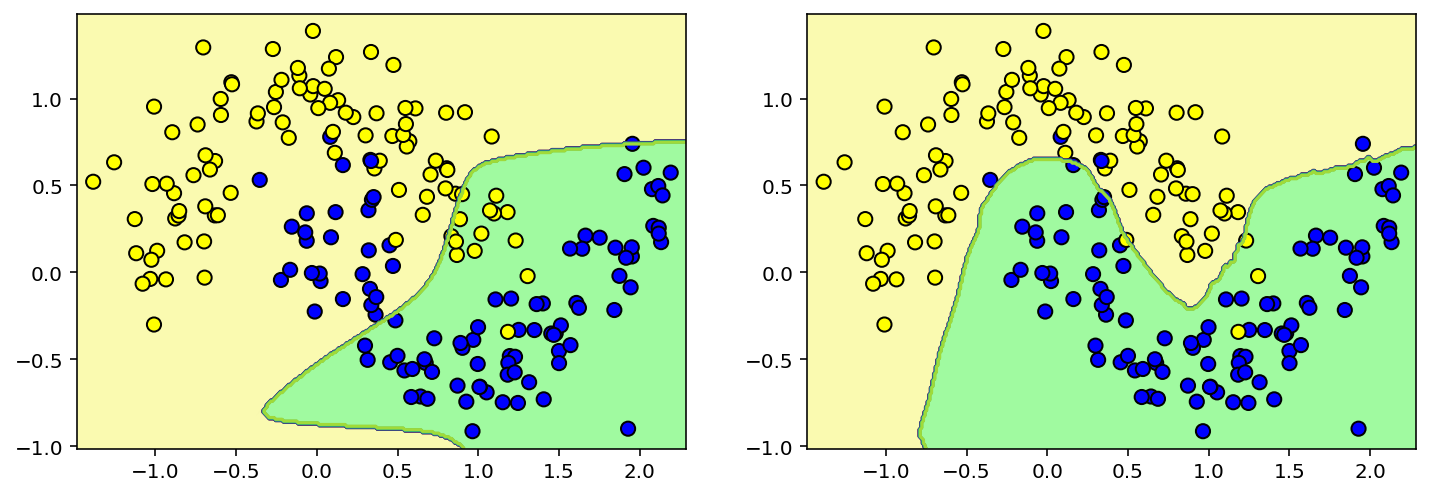

In [7]:
model.fit(X, y)
bag_clf.fit(X, y)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_classf_model(X, y, model, ax=ax[0], contour=True)
plot_classf_model(X, y, bag_clf, ax=ax[1], contour=True)

El número de veces que hacemos muestras sobre los predictores nos da una mayor precisión a la clasificación de nuestro set de prueba

5. Considerando un f1_score (dentro de sklearn.metrics), calcula el f1-score sobre el test set (X_test, y_test) considerando model y bagging_logreg. ¿Qué resultados arroja?

In [8]:
from sklearn.metrics import f1_score
f1_score(y_test, model.predict(X_test), average='macro')

0.7737272155876807

In [9]:
f1_score(y_test, y_pred, average='macro')

0.9500000000000001